# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.3.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


# Task 2: Preprocess Data

In [3]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False) # shuffle indacies
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y) # convert labels to one-hard-coded vectors
    
    return x, y

In [4]:
# load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 105s 1us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

In [8]:
class_names = ['aeroplane', 'car', 'bird']

# viasualize random examples
def show_random_examples(x, y, p):
    indacies = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indacies]
    y = y[indacies]
    
    #plotting
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])  #remove unnucessary ticks on graph
        plt.yticks([])  #remove unnucessary ticks on graph
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()

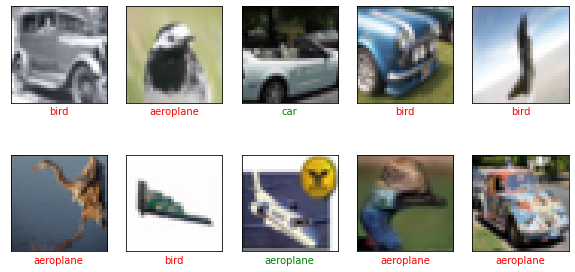

In [9]:
show_random_examples(x_train, y_train, y_train)

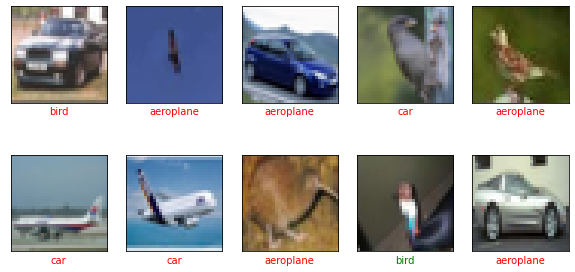

In [10]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation = 'relu', padding= 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation = 'relu'))
        model.add(MaxPooling2D(pool_size=2)) #reduce pool size into half
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (32,32,3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam', metrics = ['accuracy']
    )
    
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 15, 64)       

# Task 5: Train the Model

In [17]:
h = model.fit(
    x_train/255., y_train, #normalize by deviding pixle values
    validation_data = (x_test/255., y_test),
    epochs = 10, batch_size = 120,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3), # check whether validation accuracy is not change for 3 continuous epochs
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_(val_accuracy:.3f).h5', 
            save_best_only = True, 
            monitor = 'val_accuracy'
        )
    ]
)

Epoch 1/10
125/125 [==============================] - 51s 406ms/step - loss: 0.9218 - accuracy: 0.6741 - val_loss: 3.6775 - val_accuracy: 0.3333
Epoch 2/10
125/125 [==============================] - 51s 405ms/step - loss: 0.5613 - accuracy: 0.7746 - val_loss: 3.5475 - val_accuracy: 0.3333
Epoch 3/10
125/125 [==============================] - 52s 416ms/step - loss: 0.4952 - accuracy: 0.8009 - val_loss: 2.3783 - val_accuracy: 0.3737
Epoch 4/10
125/125 [==============================] - 52s 415ms/step - loss: 0.4434 - accuracy: 0.8257 - val_loss: 1.7226 - val_accuracy: 0.4727
Epoch 5/10
125/125 [==============================] - 45s 356ms/step - loss: 0.3969 - accuracy: 0.8453 - val_loss: 0.9588 - val_accuracy: 0.6587
Epoch 6/10
125/125 [==============================] - 51s 412ms/step - loss: 0.3689 - accuracy: 0.8534 - val_loss: 0.8391 - val_accuracy: 0.7313
Epoch 7/10
125/125 [==============================] - 41s 332ms/step - loss: 0.3451 - accuracy: 0.8679 - val_loss: 0.2962 - val_ac

# Task 6: Final Predictions

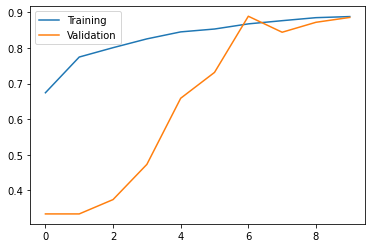

In [19]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label = 'Validation')
plt.legend()
plt.show()

In [23]:
# predictions
model = tf.keras.load_model('models/model_0.880.h5')

AttributeError: module 'tensorflow.keras' has no attribute 'load_model'

In [ ]:
preds = model.predict(x_test/255.)

In [ ]:
# check predictions
show_random_examples(x_test, y_test, preds)